Importing and basic filtering of event logs. Repeat the following tasks for the 2 event logs: small (artificial) and hospital_billing (real). Commit the solutions on your github repository.

1. Import an event log (csv format only) as a pandas dataframe

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
small = pd.read_csv('Small.csv')

2. Rename the attributes as “caseid, activity, ts” if names are different (ts is for timestamp!)

In [3]:
small
#Case ID	Activity	Complete Timestamp	

,Case ID,Activity,Complete Timestamp,Variant,Variant index
0,case_1153,Activity A,1970/01/01 09:00:00.000,Variant 2,2
1,case_1153,Activity B,1970/01/01 10:00:00.000,Variant 2,2
2,case_1153,Activity C,1970/01/01 11:00:00.000,Variant 2,2
3,case_1153,Activity D,1970/01/01 12:00:00.000,Variant 2,2
4,case_1153,Activity E,1970/01/01 13:00:00.000,Variant 2,2
...,...,...,...,...,...
111363,case_3542,Activity K,1970/01/01 14:00:00.000,Variant 5,5
111364,case_3542,Activity O,1970/01/01 15:00:00.000,Variant 5,5
111365,case_3542,Activity P,1970/01/01 16:00:00.000,Variant 5,5
111366,case_3542,Activity L,1970/01/01 17:00:00.000,Variant 5,5


In [4]:
small.columns

Index(['Case ID', 'Activity', 'Complete Timestamp', 'Variant',
       'Variant index'],
      dtype='object')

In [5]:
small.rename(columns = {'Case ID':'caseid'}, inplace = True)
small.rename(columns = {'Activity':'activity'}, inplace = True)
small.rename(columns = {'Complete Timestamp':'ts'}, inplace = True)

In [6]:
small

,caseid,activity,ts,Variant,Variant index
0,case_1153,Activity A,1970/01/01 09:00:00.000,Variant 2,2
1,case_1153,Activity B,1970/01/01 10:00:00.000,Variant 2,2
2,case_1153,Activity C,1970/01/01 11:00:00.000,Variant 2,2
3,case_1153,Activity D,1970/01/01 12:00:00.000,Variant 2,2
4,case_1153,Activity E,1970/01/01 13:00:00.000,Variant 2,2
...,...,...,...,...,...
111363,case_3542,Activity K,1970/01/01 14:00:00.000,Variant 5,5
111364,case_3542,Activity O,1970/01/01 15:00:00.000,Variant 5,5
111365,case_3542,Activity P,1970/01/01 16:00:00.000,Variant 5,5
111366,case_3542,Activity L,1970/01/01 17:00:00.000,Variant 5,5


3. Create an event log (= a new dataframe) retaining only the caseid, activity and ts attributes

In [7]:
log_small = small[["caseid","activity", "ts"]]

4. Create a new dataframe with columns caseid, list of events in a case (ordered by timestamp)

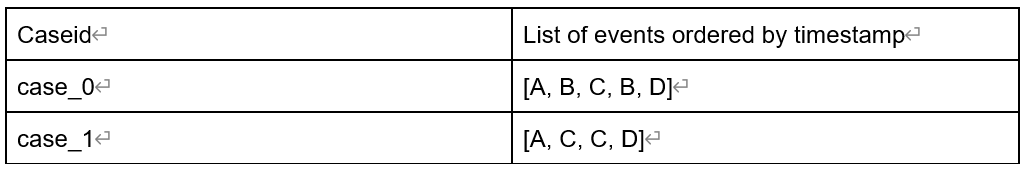

In [8]:
type(log_small['ts'][0])

str

In [9]:
#pd.set_option('display.max_rows', None)
log_small.head(100)

,caseid,activity,ts
0,case_1153,Activity A,1970/01/01 09:00:00.000
1,case_1153,Activity B,1970/01/01 10:00:00.000
2,case_1153,Activity C,1970/01/01 11:00:00.000
3,case_1153,Activity D,1970/01/01 12:00:00.000
4,case_1153,Activity E,1970/01/01 13:00:00.000
...,...,...,...
95,case_1841,Activity B,1970/01/01 10:00:00.000
96,case_1841,Activity C,1970/01/01 11:00:00.000
97,case_1841,Activity D,1970/01/01 12:00:00.000
98,case_1841,Activity E,1970/01/01 13:00:00.000


In [10]:
log2_small = log_small.replace('Activity A', 'A').replace('Activity B', 'B').replace('Activity C', 'C').replace('Activity D', 'D').replace('Activity E', 'E').replace('Activity F', 'F').replace('Activity G', 'G').replace('Activity H', 'H').replace('Activity I', 'I').replace('Activity J', 'J').replace('Activity K', 'K').replace('Activity L', 'L').replace('Activity M', 'M').replace('Activity N', 'N').replace('Activity O', 'O').replace('Activity P', 'P').replace('Activity Q', 'Q').replace('Activity R', 'R').replace('Activity S', 'S').replace('Activity T', 'T').replace('Activity U', 'U').replace('Activity W', 'W').replace('Activity X', 'X').replace('Activity Y', 'Y').replace('Activity Z', 'Z')
print(log2_small)

           caseid activity                       ts
0       case_1153        A  1970/01/01 09:00:00.000
1       case_1153        B  1970/01/01 10:00:00.000
2       case_1153        C  1970/01/01 11:00:00.000
3       case_1153        D  1970/01/01 12:00:00.000
4       case_1153        E  1970/01/01 13:00:00.000
...           ...      ...                      ...
111363  case_3542        K  1970/01/01 14:00:00.000
111364  case_3542        O  1970/01/01 15:00:00.000
111365  case_3542        P  1970/01/01 16:00:00.000
111366  case_3542        L  1970/01/01 17:00:00.000
111367  case_3542        F  1970/01/01 18:00:00.000

[111368 rows x 3 columns]


In [11]:
#pd.set_option('display.max_rows', None)
new_dataframe = log2_small.groupby('caseid')['activity'].apply(list)
new_dataframe

caseid
case_0                [A, B, C, D, E, T, F]
case_1          [A, B, C, D, E, K, Q, L, F]
case_10      [A, B, C, D, E, K, O, P, L, F]
case_100              [A, B, C, D, E, T, F]
case_1000             [A, B, C, D, E, T, F]
                          ...              
case_9995    [A, B, C, D, E, G, H, I, J, F]
case_9996             [A, B, C, D, E, T, F]
case_9997    [A, B, C, D, E, K, M, N, L, F]
case_9998             [A, B, C, D, E, T, F]
case_9999    [A, B, C, D, E, G, H, I, J, F]
Name: activity, Length: 12500, dtype: object

5.	Augment the event log created at 4 with two new attributes: duration, event_number

- duration = ts(last event in case) - ts(first event in case)
- Event_number: number of events in a case


In [ ]:
# Make the duration first!

In [17]:
log2_small

,caseid,activity,ts
0,case_1153,A,1970/01/01 09:00:00.000
1,case_1153,B,1970/01/01 10:00:00.000
2,case_1153,C,1970/01/01 11:00:00.000
3,case_1153,D,1970/01/01 12:00:00.000
4,case_1153,E,1970/01/01 13:00:00.000
...,...,...,...
111363,case_3542,K,1970/01/01 14:00:00.000
111364,case_3542,O,1970/01/01 15:00:00.000
111365,case_3542,P,1970/01/01 16:00:00.000
111366,case_3542,L,1970/01/01 17:00:00.000


In [66]:
log2_small['ts'] = pd.to_datetime(log2_small['ts'], format='%Y/%m/%d %H:%M:%S.%f')
log2_small

,caseid,activity,ts
0,case_1153,A,1970-01-01 09:00:00
1,case_1153,B,1970-01-01 10:00:00
2,case_1153,C,1970-01-01 11:00:00
3,case_1153,D,1970-01-01 12:00:00
4,case_1153,E,1970-01-01 13:00:00
...,...,...,...
111363,case_3542,K,1970-01-01 14:00:00
111364,case_3542,O,1970-01-01 15:00:00
111365,case_3542,P,1970-01-01 16:00:00
111366,case_3542,L,1970-01-01 17:00:00


In [67]:
log2_small.dtypes

caseid              object
activity            object
ts          datetime64[ns]
dtype: object

In [68]:
ts = log2_small.groupby('caseid')['ts'].apply(list)
ts

caseid
case_0       [1970-01-01 09:00:00, 1970-01-01 10:00:00, 197...
case_1       [1970-01-01 09:00:00, 1970-01-01 10:00:00, 197...
case_10      [1970-01-01 09:00:00, 1970-01-01 10:00:00, 197...
case_100     [1970-01-01 09:00:00, 1970-01-01 10:00:00, 197...
case_1000    [1970-01-01 09:00:00, 1970-01-01 10:00:00, 197...
                                   ...                        
case_9995    [1970-01-01 09:00:00, 1970-01-01 10:00:00, 197...
case_9996    [1970-01-01 09:00:00, 1970-01-01 10:00:00, 197...
case_9997    [1970-01-01 09:00:00, 1970-01-01 10:00:00, 197...
case_9998    [1970-01-01 09:00:00, 1970-01-01 10:00:00, 197...
case_9999    [1970-01-01 09:00:00, 1970-01-01 10:00:00, 197...
Name: ts, Length: 12500, dtype: object

In [69]:
ts[0][-1] - ts[0][0]

Timedelta('0 days 06:00:00')

In [71]:
ts[1][-1] - ts[1][0]

Timedelta('0 days 08:00:00')

In [88]:
for i in range(0, 12501):
    print(ts[i][-1] - ts[i][0])

0 days 06:00:00
0 days 08:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 08:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 08:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 08:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 08:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 08:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 0

0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 08:00:00
0 days 08:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 08:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 08:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 08:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 08:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 0

0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 08:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 08:00:00
0 days 06:00:00
0 days 08:00:00
0 days 06:00:00
0 days 06:00:00
0 days 06:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 08:00:00
0 days 08:00:00
0 days 06:00:00
0 days 08:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 0

0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 08:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 08:00:00
0 days 09:00:00
0 days 06:00:00
0 days 08:00:00
0 days 06:00:00
0 days 08:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 0

0 days 09:00:00
0 days 09:00:00
0 days 08:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 06:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 08:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 0

0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 08:00:00
0 days 08:00:00
0 days 06:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 08:00:00
0 days 09:00:00
0 days 08:00:00
0 days 09:00:00
0 days 08:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 08:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 08:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 0

0 days 08:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 08:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 08:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 08:00:00
0 days 06:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 08:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 0

0 days 06:00:00
0 days 09:00:00
0 days 08:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 08:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 08:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 0

0 days 08:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 08:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 08:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 06:00:00
0 days 08:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 09:00:00
0 days 08:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 09:00:00
0 days 06:00:00
0 days 06:00:00
0 days 06:00:00
0 days 09:00:00
0 days 0

IndexError: index 12500 is out of bounds for axis 0 with size 12500

In [91]:
df = []

In [92]:
for i in range(0, 12500):
    duration = ts[i][-1] - ts[i][0]
    df.append(duration)

In [93]:
df

[Timedelta('0 days 06:00:00'),
 Timedelta('0 days 08:00:00'),
 Timedelta('0 days 09:00:00'),
 Timedelta('0 days 06:00:00'),
 Timedelta('0 days 06:00:00'),
 Timedelta('0 days 09:00:00'),
 Timedelta('0 days 08:00:00'),
 Timedelta('0 days 09:00:00'),
 Timedelta('0 days 09:00:00'),
 Timedelta('0 days 09:00:00'),
 Timedelta('0 days 08:00:00'),
 Timedelta('0 days 06:00:00'),
 Timedelta('0 days 09:00:00'),
 Timedelta('0 days 09:00:00'),
 Timedelta('0 days 09:00:00'),
 Timedelta('0 days 06:00:00'),
 Timedelta('0 days 09:00:00'),
 Timedelta('0 days 06:00:00'),
 Timedelta('0 days 09:00:00'),
 Timedelta('0 days 06:00:00'),
 Timedelta('0 days 06:00:00'),
 Timedelta('0 days 09:00:00'),
 Timedelta('0 days 09:00:00'),
 Timedelta('0 days 06:00:00'),
 Timedelta('0 days 09:00:00'),
 Timedelta('0 days 08:00:00'),
 Timedelta('0 days 09:00:00'),
 Timedelta('0 days 09:00:00'),
 Timedelta('0 days 09:00:00'),
 Timedelta('0 days 06:00:00'),
 Timedelta('0 days 06:00:00'),
 Timedelta('0 days 09:00:00'),
 Timedel

In [94]:
duration = pd.DataFrame (df, columns = ['duration'])
print(duration)

             duration
0     0 days 06:00:00
1     0 days 08:00:00
2     0 days 09:00:00
3     0 days 06:00:00
4     0 days 06:00:00
...               ...
12495 0 days 09:00:00
12496 0 days 06:00:00
12497 0 days 09:00:00
12498 0 days 06:00:00
12499 0 days 09:00:00

[12500 rows x 1 columns]


In [95]:
# make the Event_number
new_dataframe

caseid
case_0                [A, B, C, D, E, T, F]
case_1          [A, B, C, D, E, K, Q, L, F]
case_10      [A, B, C, D, E, K, O, P, L, F]
case_100              [A, B, C, D, E, T, F]
case_1000             [A, B, C, D, E, T, F]
                          ...              
case_9995    [A, B, C, D, E, G, H, I, J, F]
case_9996             [A, B, C, D, E, T, F]
case_9997    [A, B, C, D, E, K, M, N, L, F]
case_9998             [A, B, C, D, E, T, F]
case_9999    [A, B, C, D, E, G, H, I, J, F]
Name: activity, Length: 12500, dtype: object

In [110]:
event = []

In [111]:
for i in range(0, 12500):
    length = len(new_dataframe[i])
    event.append(length)

In [112]:
event = pd.DataFrame (event, columns = ['Event_number'])
print(event)

       Event_number
0                 7
1                 9
2                10
3                 7
4                 7
...             ...
12495            10
12496             7
12497            10
12498             7
12499            10

[12500 rows x 1 columns]


In [ ]:
# 이제 caseid, activity, duration, Event_number로 구성된 dataframe 만들기

In [113]:
new_dataframe

caseid
case_0                [A, B, C, D, E, T, F]
case_1          [A, B, C, D, E, K, Q, L, F]
case_10      [A, B, C, D, E, K, O, P, L, F]
case_100              [A, B, C, D, E, T, F]
case_1000             [A, B, C, D, E, T, F]
                          ...              
case_9995    [A, B, C, D, E, G, H, I, J, F]
case_9996             [A, B, C, D, E, T, F]
case_9997    [A, B, C, D, E, K, M, N, L, F]
case_9998             [A, B, C, D, E, T, F]
case_9999    [A, B, C, D, E, G, H, I, J, F]
Name: activity, Length: 12500, dtype: object

In [127]:
new_dataframe = new_dataframe.reset_index(level=0)

In [128]:
new = pd.DataFrame(new_dataframe, columns = ['caseid', 'activity'])
print(new)

          caseid                        activity
0         case_0           [A, B, C, D, E, T, F]
1         case_1     [A, B, C, D, E, K, Q, L, F]
2        case_10  [A, B, C, D, E, K, O, P, L, F]
3       case_100           [A, B, C, D, E, T, F]
4      case_1000           [A, B, C, D, E, T, F]
...          ...                             ...
12495  case_9995  [A, B, C, D, E, G, H, I, J, F]
12496  case_9996           [A, B, C, D, E, T, F]
12497  case_9997  [A, B, C, D, E, K, M, N, L, F]
12498  case_9998           [A, B, C, D, E, T, F]
12499  case_9999  [A, B, C, D, E, G, H, I, J, F]

[12500 rows x 2 columns]


In [157]:
result = pd.concat([new_dataframe, duration, event], axis=1)
result

,caseid,activity,duration,Event_number
0,case_0,"[A, B, C, D, E, T, F]",0 days 06:00:00,7
1,case_1,"[A, B, C, D, E, K, Q, L, F]",0 days 08:00:00,9
2,case_10,"[A, B, C, D, E, K, O, P, L, F]",0 days 09:00:00,10
3,case_100,"[A, B, C, D, E, T, F]",0 days 06:00:00,7
4,case_1000,"[A, B, C, D, E, T, F]",0 days 06:00:00,7
...,...,...,...,...
12495,case_9995,"[A, B, C, D, E, G, H, I, J, F]",0 days 09:00:00,10
12496,case_9996,"[A, B, C, D, E, T, F]",0 days 06:00:00,7
12497,case_9997,"[A, B, C, D, E, K, M, N, L, F]",0 days 09:00:00,10
12498,case_9998,"[A, B, C, D, E, T, F]",0 days 06:00:00,7


6.	Find the longest/shortest case by duration - duration = ts(last event in case) - ts(first event in case)

In [158]:
result['duration'].max()

Timedelta('0 days 09:00:00')

In [159]:
max = result[result['duration'] == '0 days 09:00:00']
max

,caseid,activity,duration,Event_number
2,case_10,"[A, B, C, D, E, K, O, P, L, F]",0 days 09:00:00,10
5,case_10000,"[A, B, C, D, E, G, H, I, J, F]",0 days 09:00:00,10
7,case_10002,"[A, B, C, D, E, G, H, I, J, F]",0 days 09:00:00,10
8,case_10003,"[A, B, C, D, E, G, H, I, J, F]",0 days 09:00:00,10
9,case_10004,"[A, B, C, D, E, G, H, I, J, F]",0 days 09:00:00,10
...,...,...,...,...
12492,case_9992,"[A, B, C, D, E, K, R, S, L, F]",0 days 09:00:00,10
12493,case_9993,"[A, B, C, D, E, G, H, I, J, F]",0 days 09:00:00,10
12495,case_9995,"[A, B, C, D, E, G, H, I, J, F]",0 days 09:00:00,10
12497,case_9997,"[A, B, C, D, E, K, M, N, L, F]",0 days 09:00:00,10


In [160]:
result['duration'].min()

Timedelta('0 days 06:00:00')

In [161]:
min = result[result['duration'] == '0 days 06:00:00']
min

,caseid,activity,duration,Event_number
0,case_0,"[A, B, C, D, E, T, F]",0 days 06:00:00,7
3,case_100,"[A, B, C, D, E, T, F]",0 days 06:00:00,7
4,case_1000,"[A, B, C, D, E, T, F]",0 days 06:00:00,7
11,case_10006,"[A, B, C, D, E, T, F]",0 days 06:00:00,7
15,case_1001,"[A, B, C, D, E, T, F]",0 days 06:00:00,7
...,...,...,...,...
12484,case_9985,"[A, B, C, D, E, T, F]",0 days 06:00:00,7
12486,case_9987,"[A, B, C, D, E, T, F]",0 days 06:00:00,7
12494,case_9994,"[A, B, C, D, E, T, F]",0 days 06:00:00,7
12496,case_9996,"[A, B, C, D, E, T, F]",0 days 06:00:00,7


7.	Find the longest case(s) by number of events

In [162]:
result['Event_number'].max()

10

In [165]:
max_event = result[result['Event_number'] == 10]
max_event

,caseid,activity,duration,Event_number
2,case_10,"[A, B, C, D, E, K, O, P, L, F]",0 days 09:00:00,10
5,case_10000,"[A, B, C, D, E, G, H, I, J, F]",0 days 09:00:00,10
7,case_10002,"[A, B, C, D, E, G, H, I, J, F]",0 days 09:00:00,10
8,case_10003,"[A, B, C, D, E, G, H, I, J, F]",0 days 09:00:00,10
9,case_10004,"[A, B, C, D, E, G, H, I, J, F]",0 days 09:00:00,10
...,...,...,...,...
12492,case_9992,"[A, B, C, D, E, K, R, S, L, F]",0 days 09:00:00,10
12493,case_9993,"[A, B, C, D, E, G, H, I, J, F]",0 days 09:00:00,10
12495,case_9995,"[A, B, C, D, E, G, H, I, J, F]",0 days 09:00:00,10
12497,case_9997,"[A, B, C, D, E, K, M, N, L, F]",0 days 09:00:00,10


In [ ]:
# complete !